## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

from sklearn.preprocessing import power_transform

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.decomposition import PCA
pca = PCA()

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Import the necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Internship\Micro Credit Project\Data file.csv")
data.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Import and Visualise the data

#### The following are not necessary for the analysis
The following does not help for the analysis
 - Unnamed: 0 - which is not necessary
 - msisdn - mobile number of user
 - pdate - date
The following should be deleted because it is repeated twice in different names
 - fr_ma_rech30 - Frequency of main account recharged in last 30 days
 - fr_ma_rech90 - Frequency of main account recharged in last 90 days
 - fr_da_rech30 - Frequency of data account recharged in last 30 days
 - fr_da_rech90 - Frequency of data account recharged in last 90 days
 The following columns should be deleted because there is already the total amount mentioned and also the median amount is mentioned
  - medianamnt_ma_rech30 - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
  - medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
  - medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
  - medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
  - medianamnt_loans30 - Median of amounts of loan taken by the user in last 30 days
  - medianamnt_loans90 - Median of amounts of loan taken by the user in last 90 days 

In [3]:
data = data.drop(['Unnamed: 0','msisdn','pdate','fr_ma_rech30','fr_ma_rech90','fr_da_rech30','fr_da_rech90','medianamnt_ma_rech30','medianmarechprebal30','medianamnt_ma_rech90','medianmarechprebal90','medianamnt_loans30','medianamnt_loans90'],axis=1)

Dropped the columns which does not give any clue to analysis

In [4]:
data.nunique().sort_values()

pcircle                   1
label                     2
maxamnt_loans90           3
cnt_da_rech90            27
cnt_loans30              40
amnt_loans30             48
amnt_loans90             69
last_rech_amt_ma         70
cnt_ma_rech30            71
cnt_ma_rech90           110
maxamnt_loans30        1050
cnt_da_rech30          1066
cnt_loans90            1110
last_rech_date_da      1174
last_rech_date_ma      1186
payback30              1363
payback90              2381
aon                    4507
sumamnt_ma_rech30     15141
sumamnt_ma_rech90     31771
rental30             132148
rental90             141033
daily_decr30         147025
daily_decr90         158669
dtype: int64

- Since pcircle is a single value, it is not going to help. So, drop it
- Consider label and maxamnt_loans90 as categorical variable

In [5]:
data = data.drop('pcircle', axis =1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   label              209593 non-null  int64  
 1   aon                209593 non-null  float64
 2   daily_decr30       209593 non-null  float64
 3   daily_decr90       209593 non-null  float64
 4   rental30           209593 non-null  float64
 5   rental90           209593 non-null  float64
 6   last_rech_date_ma  209593 non-null  float64
 7   last_rech_date_da  209593 non-null  float64
 8   last_rech_amt_ma   209593 non-null  int64  
 9   cnt_ma_rech30      209593 non-null  int64  
 10  sumamnt_ma_rech30  209593 non-null  float64
 11  cnt_ma_rech90      209593 non-null  int64  
 12  sumamnt_ma_rech90  209593 non-null  int64  
 13  cnt_da_rech30      209593 non-null  float64
 14  cnt_da_rech90      209593 non-null  int64  
 15  cnt_loans30        209593 non-null  int64  
 16  am

- All the data are in float or integer type. No need of encoding
- There is no null values. Recheck using .isnull

# EDA and Data Preprocessing

In [7]:
data.isnull().sum()

label                0
aon                  0
daily_decr30         0
daily_decr90         0
rental30             0
rental90             0
last_rech_date_ma    0
last_rech_date_da    0
last_rech_amt_ma     0
cnt_ma_rech30        0
sumamnt_ma_rech30    0
cnt_ma_rech90        0
sumamnt_ma_rech90    0
cnt_da_rech30        0
cnt_da_rech90        0
cnt_loans30          0
amnt_loans30         0
maxamnt_loans30      0
cnt_loans90          0
amnt_loans90         0
maxamnt_loans90      0
payback30            0
payback90            0
dtype: int64

There is no null values present as said

In [8]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,262.578110,0.041495,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4183.897978,0.397556,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,0.000000,0.000000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,0.000000,0.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,0.000000,0.000000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99914.441420,38.000000,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000


- The outliers in the data has to be treated
- The data has to be standardised
- The target label has to be balanced

In [9]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'cnt_ma_rech90',
       'sumamnt_ma_rech90', 'cnt_da_rech30', 'cnt_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [10]:
class_data = data[['label','maxamnt_loans90']]

<function matplotlib.pyplot.show(close=None, block=None)>

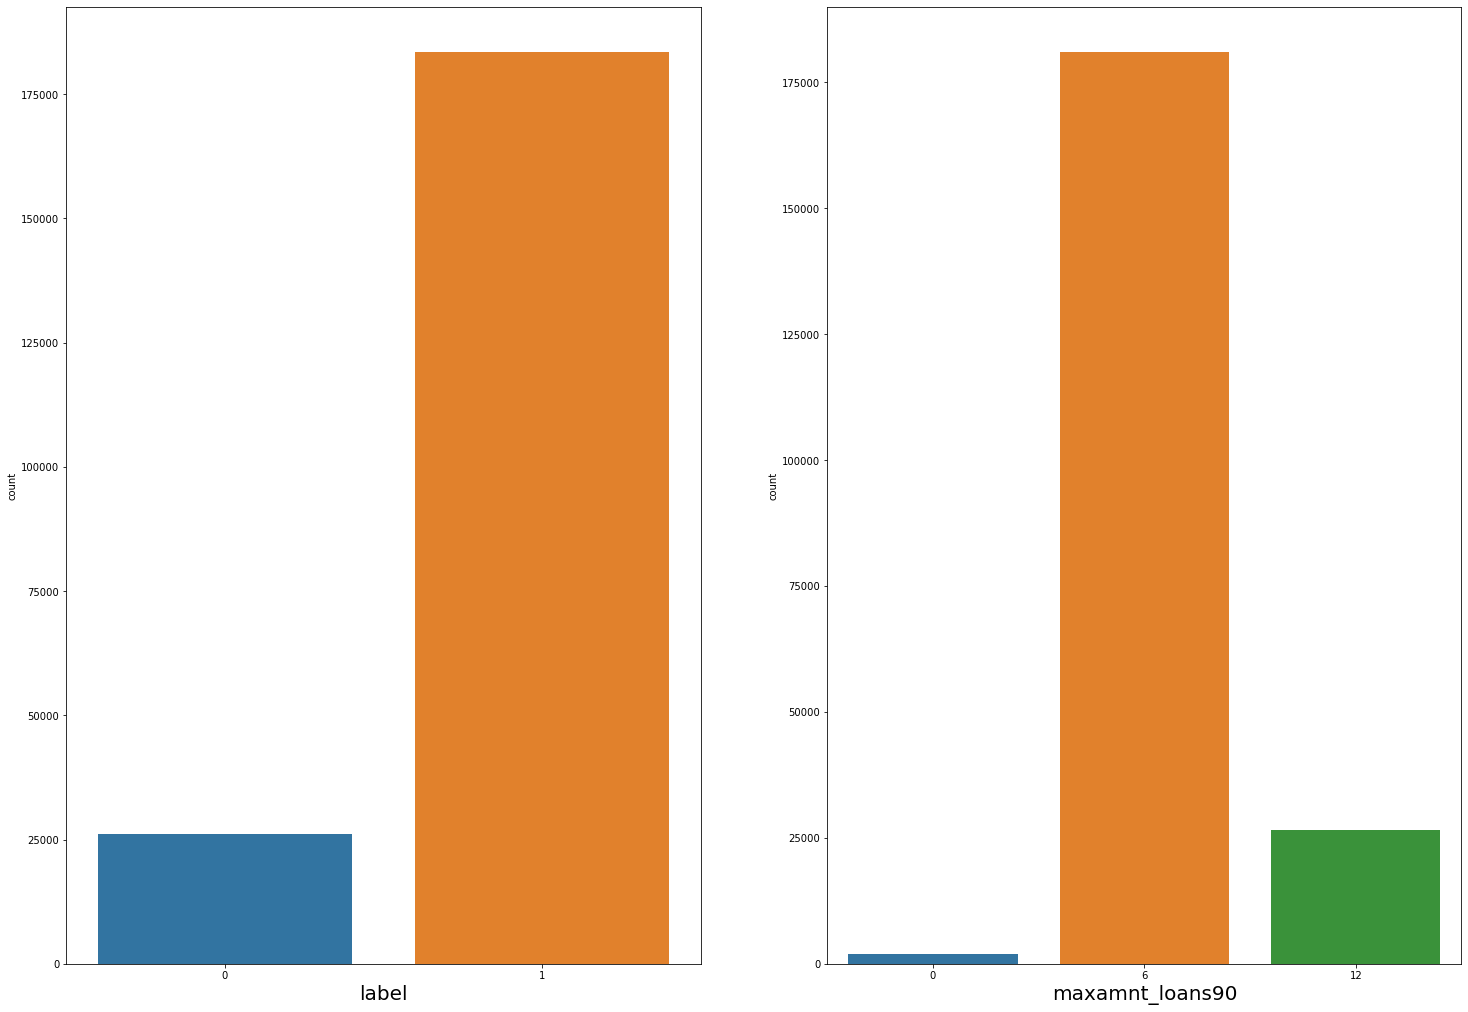

In [11]:
plt.figure(figsize = (25,250), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <= 24:
        ax =  plt.subplot(12,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- The target label is imbalanced
- maximum amount of loan taken by the user in last 90 days is also divided into 3 which is imbalanced

In [12]:
cont_data = data.drop(['label','maxamnt_loans90'],axis=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<function matplotlib.pyplot.show(close=None, block=None)>

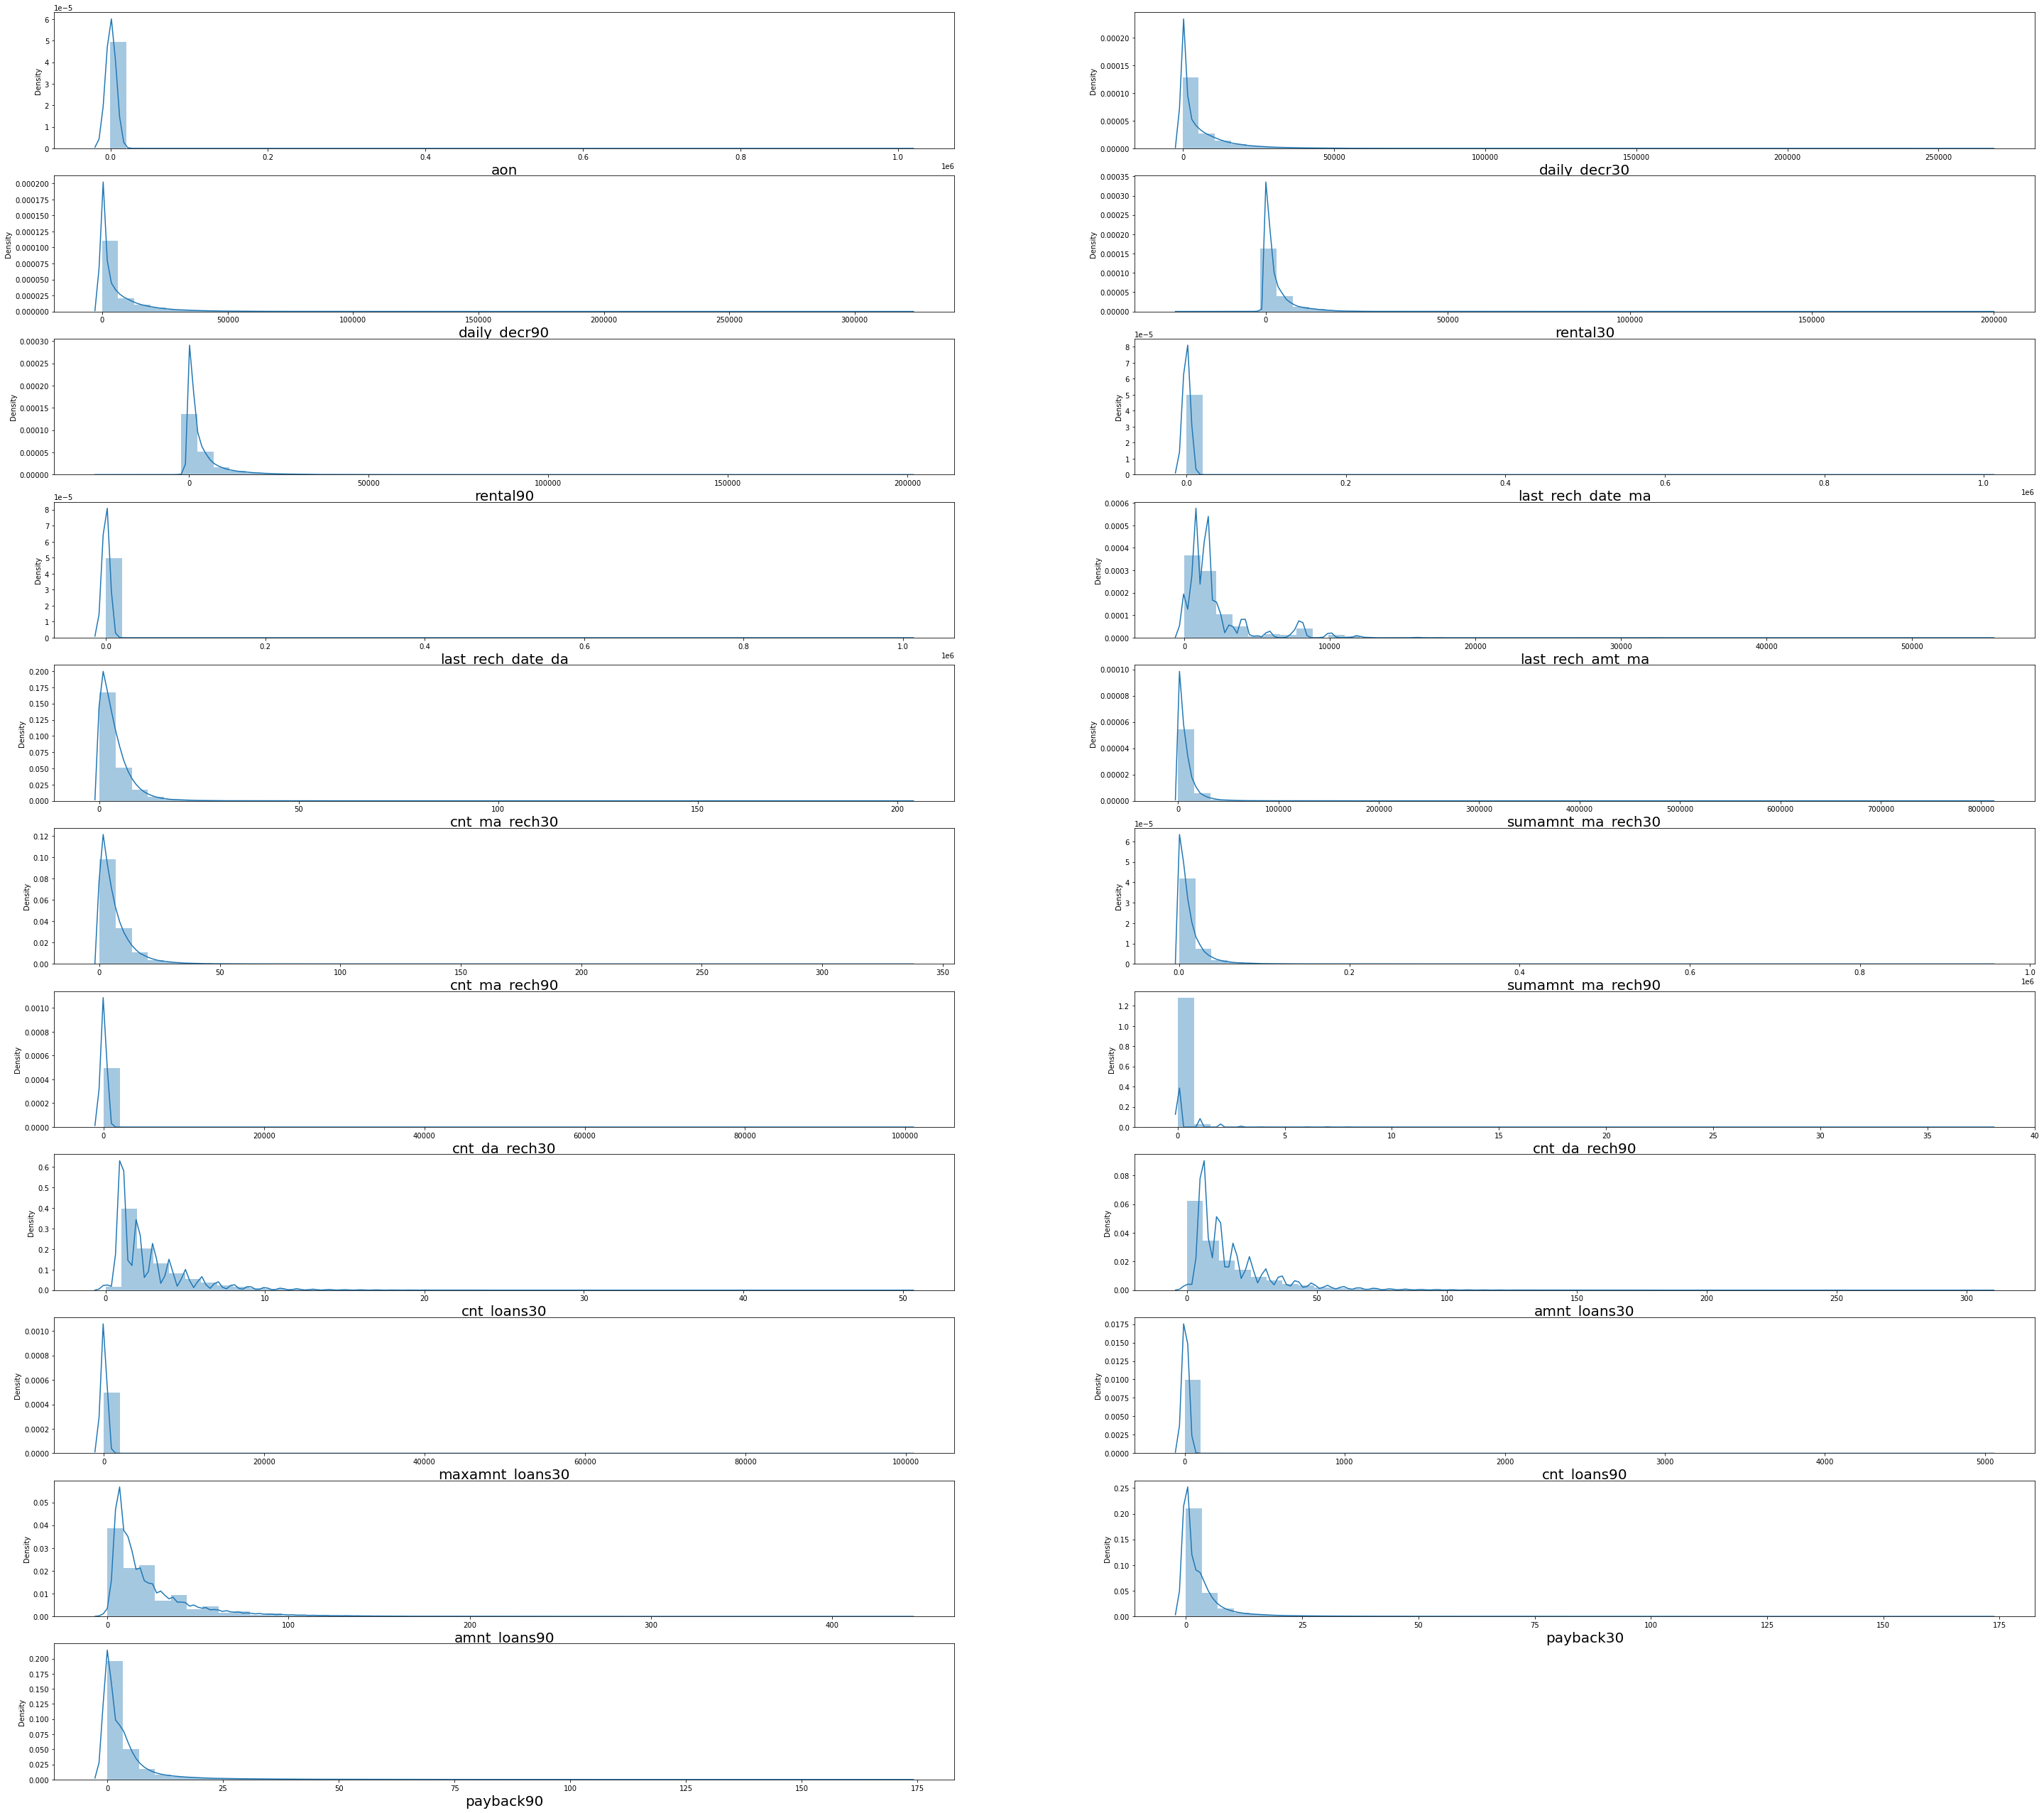

In [13]:
plt.figure(figsize = (50,50), facecolor = 'white')
plotnumber = 1

for column in cont_data:
    if plotnumber <= 24:
        ax =  plt.subplot(12,2,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

All are standardised curved but there is so many outliers found in almost all the columns. Treat it within the data loss of 7-8% as client request

In [14]:
counter = 0
r,c = data.shape

data = data.copy()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

if data.shape==(r,c):
    print('\n The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped {r-data.shape[0]}')

Number of duplicates dropped 407


Though removing duplicates affects the percentage loss of data, it is necessary for the model to not be biased

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

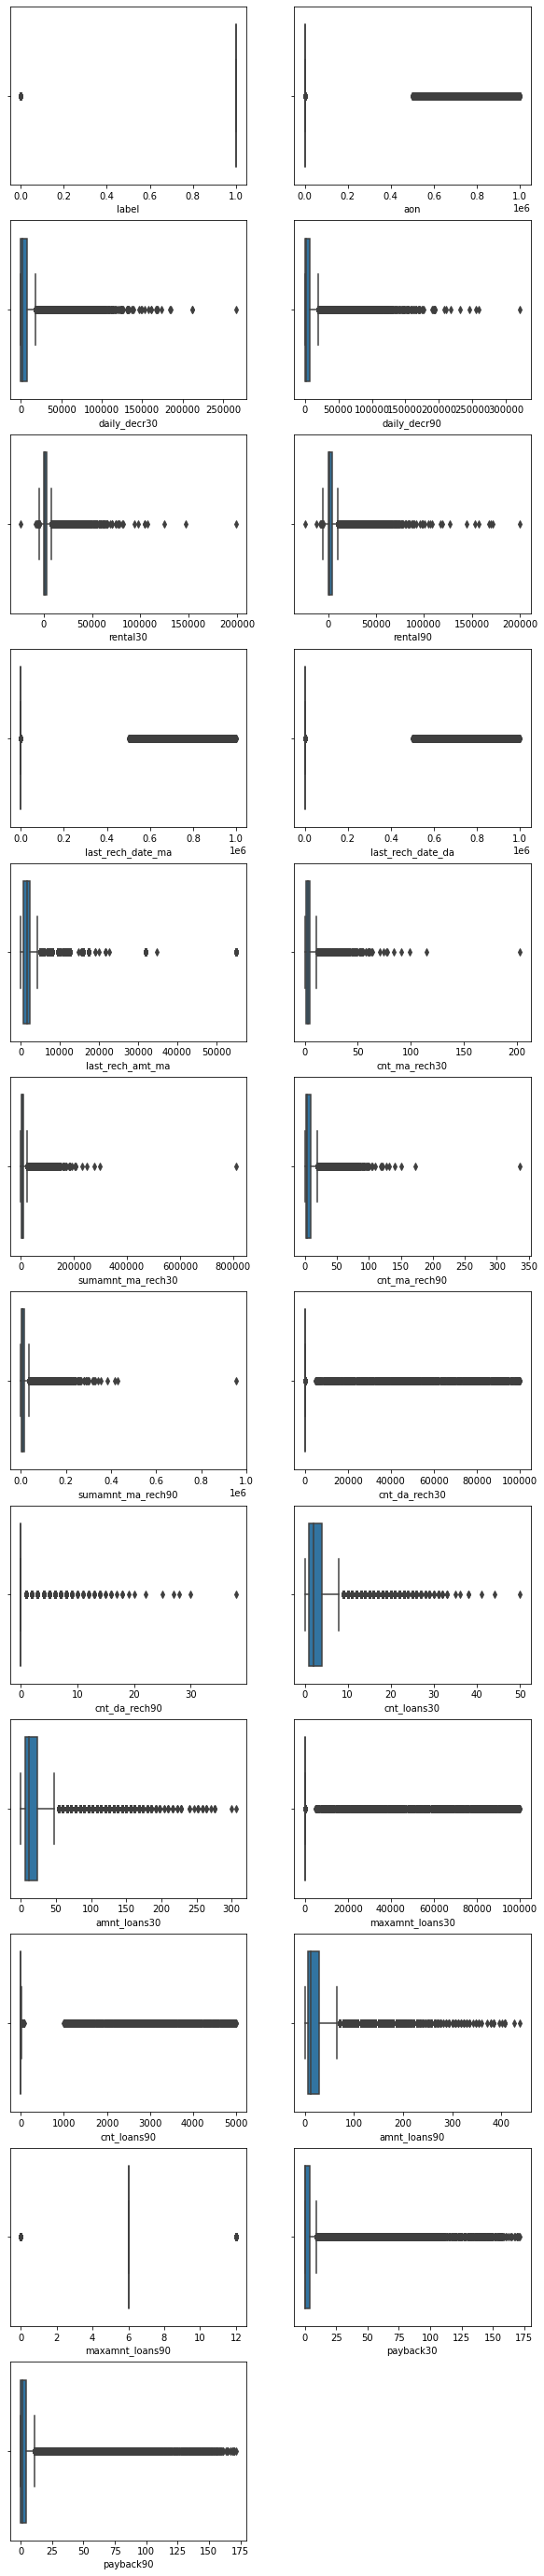

In [15]:
plt.figure(figsize=(10,50))
graph = 1
for column in data:
    if graph<= 24:
        ax = plt.subplot(12,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There are more outliers. If we treat with threshold as 3, the data loss would be maximum

In [16]:
z = np.abs(zscore(data))
data_new = data[(z<5).all(axis=1)]
print('Before removing outlier', data.shape)
print('After removing outlier', data_new.shape)

Before removing outlier (209186, 23)
After removing outlier (194702, 23)


In [17]:
Data_loss = ((209594-194702)/209594)*100
Data_loss

7.105165224195349

Keeping the threshold as 5, we can treat outliers with the data loss of 7.10%

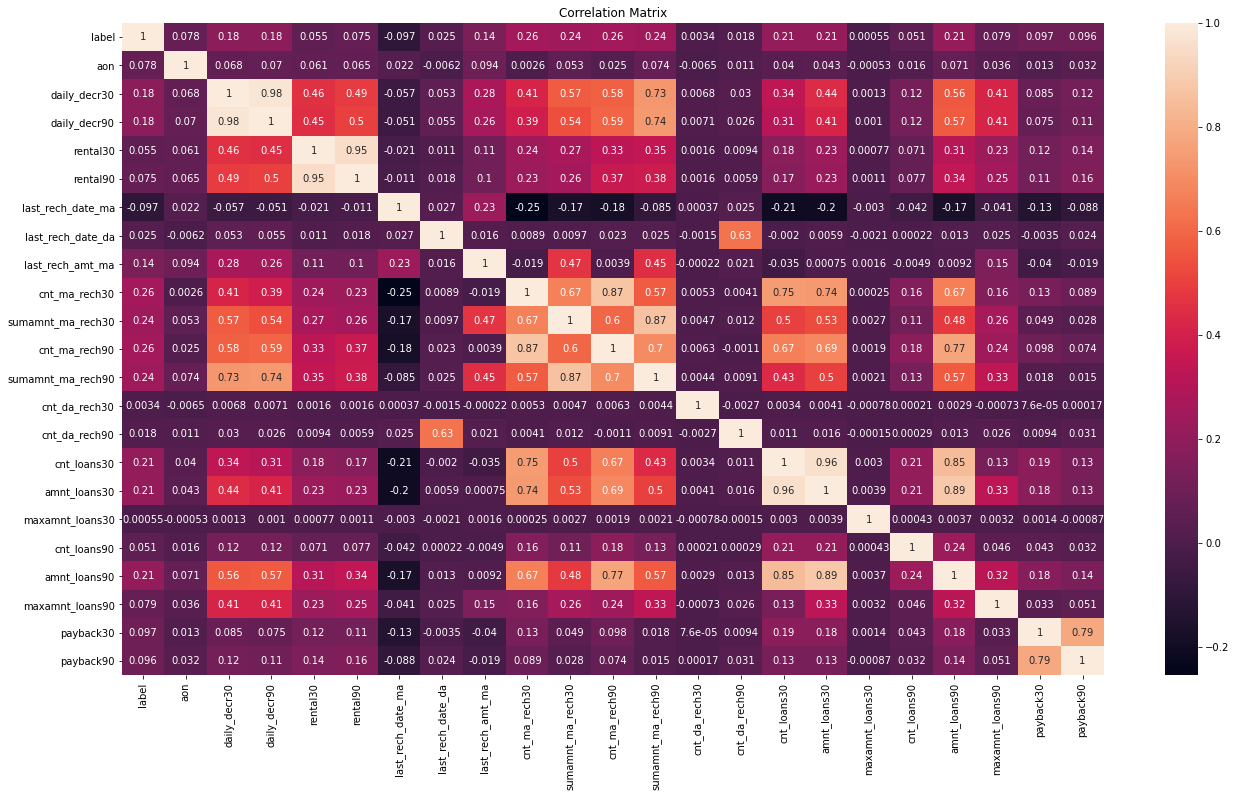

In [18]:
corr_mat = data_new.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

- daily_decr30 and daily_decr90 are 98% correlated
- rental30 and rental90 are 95% correlated
- cnt_loans30 and amnt_loans30 are 96% correlated
Recheck the correlation using scatterplot

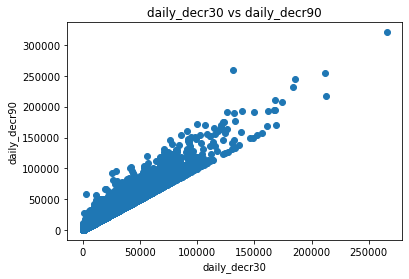

In [19]:
plt.scatter(data.daily_decr30, data.daily_decr90)
plt.xlabel('daily_decr30')
plt.ylabel('daily_decr90')
plt.title ('daily_decr30 vs daily_decr90')
plt.show()

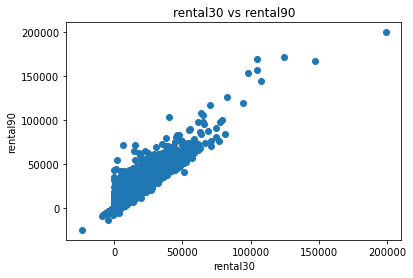

In [20]:
plt.scatter(data.rental30, data.rental90)
plt.xlabel('rental30')
plt.ylabel('rental90')
plt.title ('rental30 vs rental90')
plt.show()

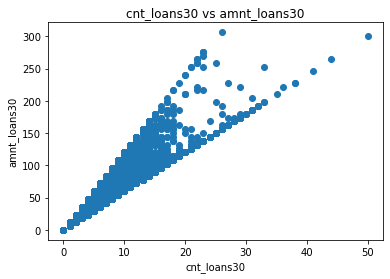

In [21]:
plt.scatter(data.cnt_loans30, data.amnt_loans30)
plt.xlabel('cnt_loans30') 
plt.ylabel('amnt_loans30')
plt.title ('cnt_loans30 vs amnt_loans30')
plt.show()

All are highly correlated, so remove any 1 column from each correlated variables

In [22]:
data = data.drop(['cnt_loans30', 'rental30', 'daily_decr30'],axis =1)

# Data Manipulation

In [23]:
x = data_new.drop('label',axis=1)
y = data_new['label']

Separate the labels and target

In [24]:
x.skew().sort_values(ascending=False)

cnt_loans90          69.507719
maxamnt_loans30      40.456322
cnt_da_rech30        37.243256
last_rech_date_da     9.853065
cnt_da_rech90         7.519040
payback30             3.689166
payback90             3.407818
last_rech_date_ma     3.073990
rental90              2.598932
rental30              2.471939
daily_decr90          2.418530
daily_decr30          2.280506
last_rech_amt_ma      2.221179
sumamnt_ma_rech90     2.162049
amnt_loans90          2.160287
sumamnt_ma_rech30     2.073846
amnt_loans30          1.895392
cnt_loans30           1.880174
cnt_ma_rech90         1.813972
maxamnt_loans90       1.752904
cnt_ma_rech30         1.657029
aon                   0.945877
dtype: float64

Check for skewness and treat it using power transformer

In [25]:
x_new = power_transform(x)
x = pd.DataFrame (x_new,columns = x.columns)

In [26]:
x_scaled = scaler.fit_transform(x)

Scale the data using Standard Scalar

# Feature Selection

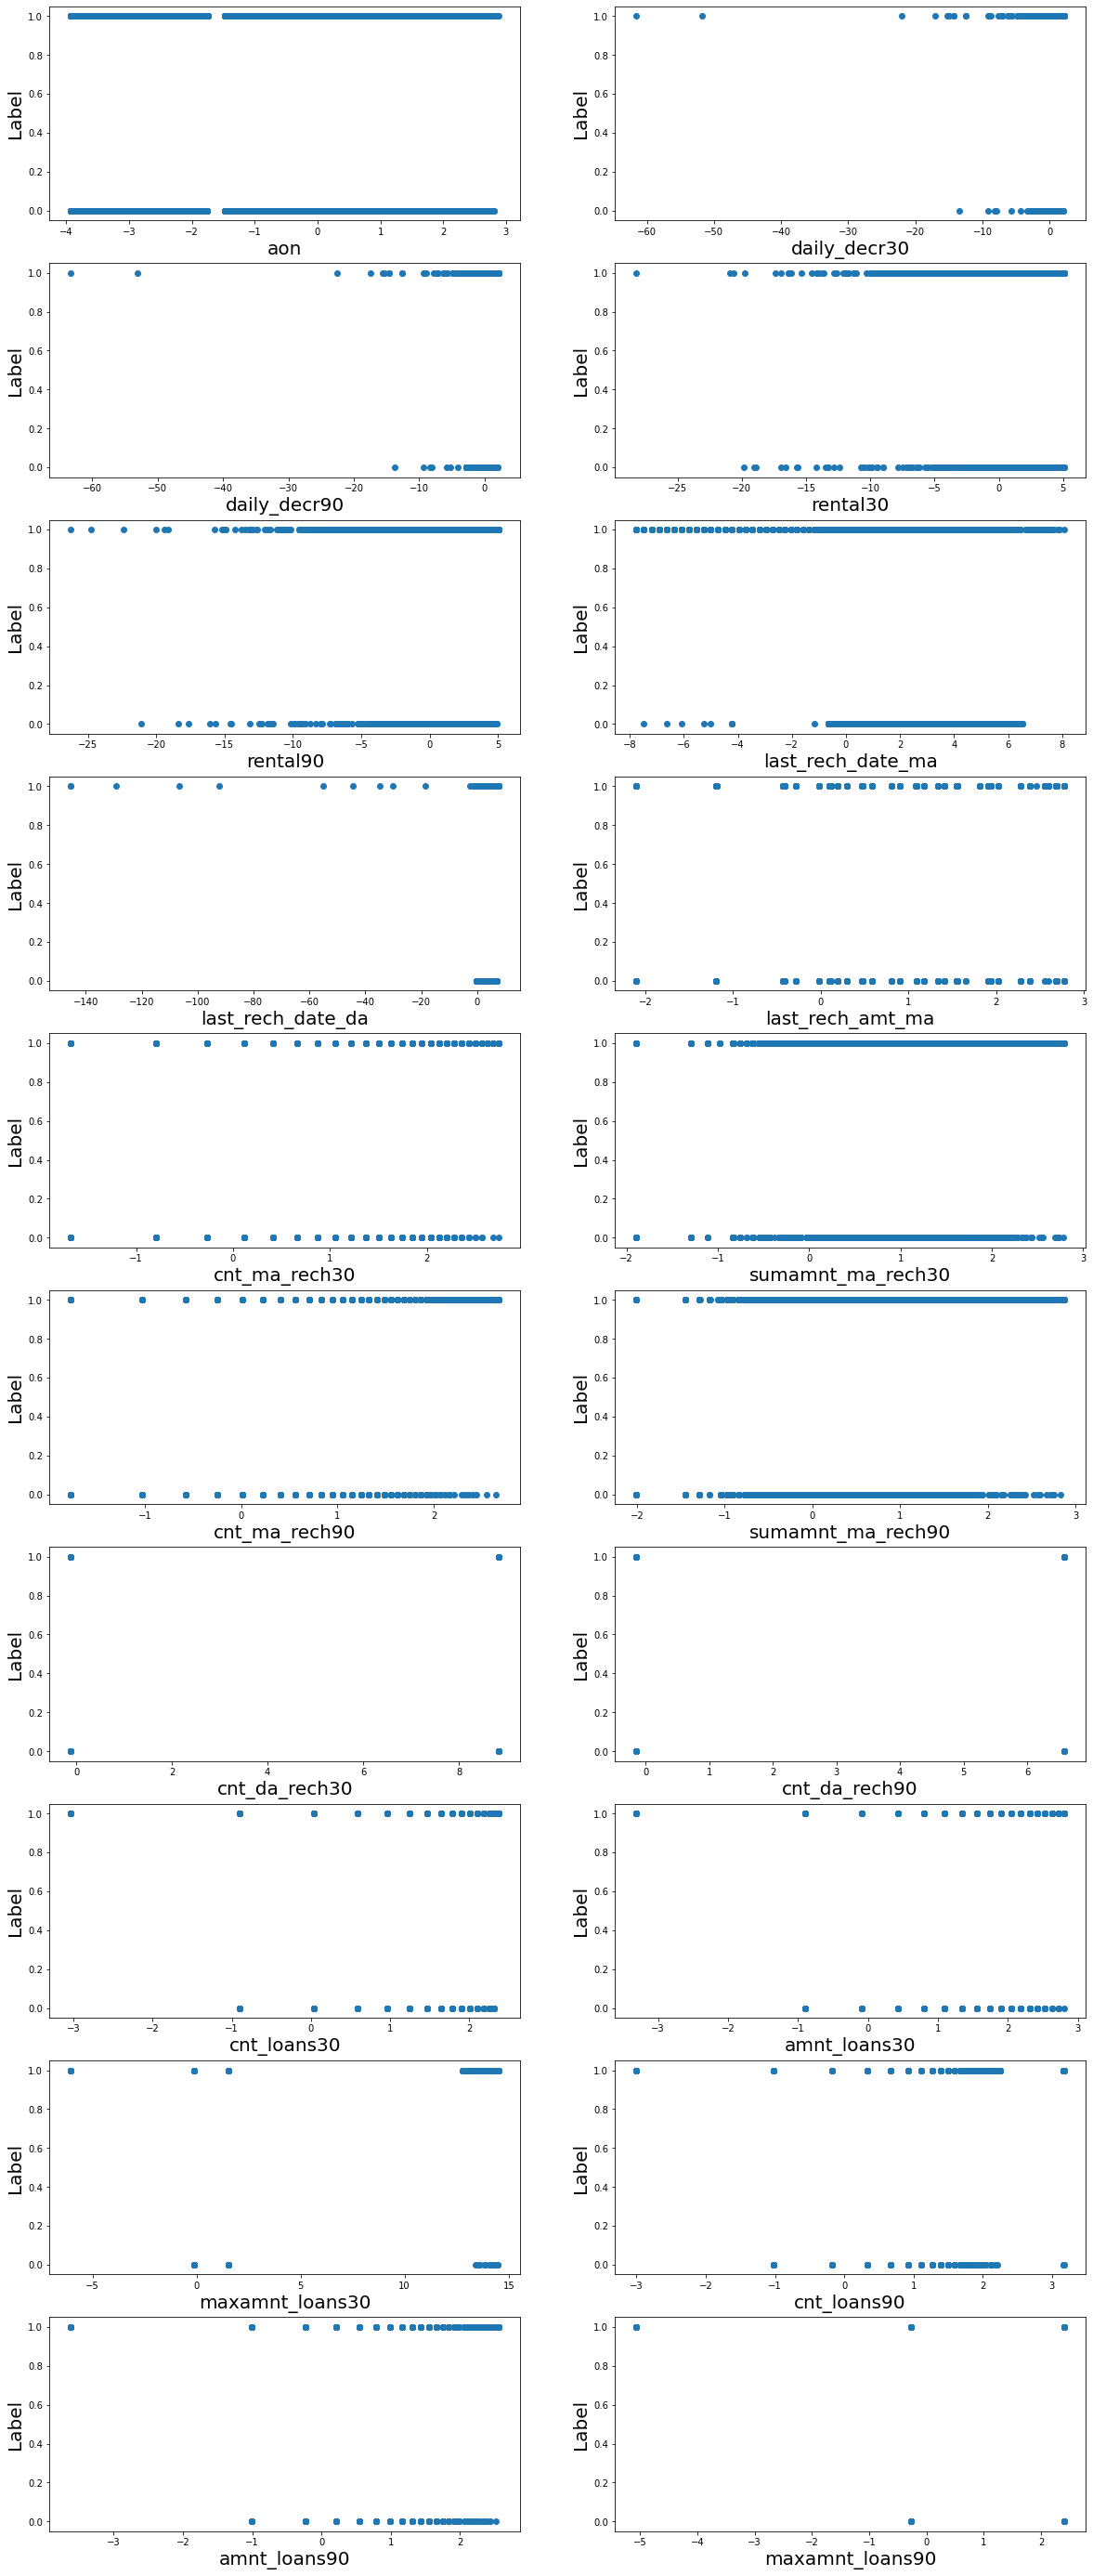

In [27]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=20:
        ax = plt.subplot(10,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Label', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between the labels and target looks fairly linear

In [28]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor (x_scaled,i)for i in range (x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.029992,aon
1,280.271670,daily_decr30
2,291.416193,daily_decr90
3,14.218808,rental30
4,15.269280,rental90
5,1.580086,last_rech_date_ma
6,1.715692,last_rech_date_da
7,4.342245,last_rech_amt_ma
8,28.368151,cnt_ma_rech30
9,24.170609,sumamnt_ma_rech30


There is multi-collinearity in large level. So, select the features using Principal component analysis

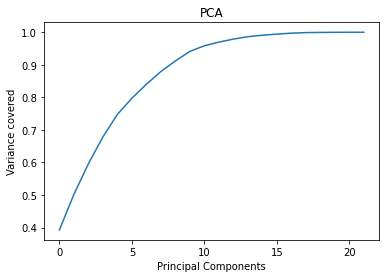

In [29]:
pca.fit_transform (x)
plt.figure ()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel ('Variance covered')
plt.title ('PCA')
plt.show()

From the above graph, 15 features can be used to determine the value of the model

In [30]:
pca = PCA (n_components = 15)
pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(pcomp)
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.303949,1.047553,0.032527,0.526961,-0.735260,-0.632690,-0.984986,-1.180655,0.554128,-1.970993,0.148613,-0.523624,-0.018040,-0.303733,-0.083003
1,0.312595,-2.434907,0.254624,-2.298966,2.732023,-0.730367,-0.246161,-0.280178,0.220403,-0.579992,-0.354823,-0.000066,-0.107072,-0.886747,-0.316269
2,2.601181,-0.742764,0.256934,-0.157622,0.385216,0.287852,0.262173,-0.665425,0.170172,-0.199909,-0.533321,-0.275932,-0.010573,-0.162672,-0.062871
3,3.146512,0.479743,-0.058643,-0.608466,0.790277,-1.958126,-2.339450,0.830078,-0.302082,1.578913,-0.316217,0.210383,-0.039487,0.015190,0.211741
4,-2.770658,1.725361,0.092881,1.280125,0.435582,-0.202281,0.550788,1.234479,-0.360379,0.579863,-0.390916,0.140591,-0.032439,-0.163667,-0.166535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194697,0.154051,0.284832,0.250837,1.034413,0.666795,0.609976,0.018081,0.758073,-0.025918,-0.834792,-0.490212,-0.013986,-0.009958,-0.073303,-0.017895
194698,-0.019606,1.315845,0.084183,0.256489,-0.308090,-0.280279,0.810882,0.902026,-0.347639,0.629253,0.307750,0.068433,-0.002625,0.028888,0.104104
194699,-4.282676,-0.080848,0.122008,-2.367699,0.458579,-0.298627,0.518365,-0.056159,0.018553,-0.184026,0.399425,0.363290,-0.088341,-0.328137,0.254591
194700,-2.353601,-1.183743,-6.859596,-1.074882,1.525933,-0.342099,1.836731,-1.993161,-3.232304,-0.692774,0.988210,0.778182,3.019146,0.190388,-1.230847


Best 15 features are selected to evaluate the model

# Model Building

In [31]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.8854934387920187 on Random State 168


In [32]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({1: 136284, 0: 19477})


C:\Users\Lenovo\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


After fit Counter({1: 136284, 0: 102213})


Balanced the imbalance dataset using SMOTE

In [33]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=.20, random_state = 168)

## Logistic regression

In [34]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 88.54934387920187
[[  725  4004]
 [  455 33757]]
              precision    recall  f1-score   support

           0       0.61      0.15      0.25      4729
           1       0.89      0.99      0.94     34212

    accuracy                           0.89     38941
   macro avg       0.75      0.57      0.59     38941
weighted avg       0.86      0.89      0.85     38941



## Decision Tree

In [35]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 85.81443722554634
[[ 2181  2548]
 [ 2976 31236]]
              precision    recall  f1-score   support

           0       0.42      0.46      0.44      4729
           1       0.92      0.91      0.92     34212

    accuracy                           0.86     38941
   macro avg       0.67      0.69      0.68     38941
weighted avg       0.86      0.86      0.86     38941



## Random Forest Classifier

In [36]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 90.90418838756067
[[ 1966  2763]
 [  779 33433]]
              precision    recall  f1-score   support

           0       0.72      0.42      0.53      4729
           1       0.92      0.98      0.95     34212

    accuracy                           0.91     38941
   macro avg       0.82      0.70      0.74     38941
weighted avg       0.90      0.91      0.90     38941



## SVC

In [37]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 89.95146503685062
[[ 1287  3442]
 [  471 33741]]
              precision    recall  f1-score   support

           0       0.73      0.27      0.40      4729
           1       0.91      0.99      0.95     34212

    accuracy                           0.90     38941
   macro avg       0.82      0.63      0.67     38941
weighted avg       0.89      0.90      0.88     38941



## KNeighbors Classifier

In [38]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('Accuracy', accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Accuracy 90.18771988392696
[[ 2045  2684]
 [ 1137 33075]]
              precision    recall  f1-score   support

           0       0.64      0.43      0.52      4729
           1       0.92      0.97      0.95     34212

    accuracy                           0.90     38941
   macro avg       0.78      0.70      0.73     38941
weighted avg       0.89      0.90      0.89     38941



Accuracy score
- Logistic Regression      - 0.89
- Decision tree            - 0.86
- Random Forest Classifier - 0.91
- SVC                      - 0.90
- KNeighbors Classifier    - 0.90

## Cross Validation

In [39]:
sc = cross_val_score(LR,princi_comp,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,princi_comp,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,princi_comp,y,cv=5)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,princi_comp,y,cv=5)
print('SVC cvs:',sc3.mean())

sc4 = cross_val_score(knn,princi_comp,y,cv=5)
print('KNN cvs:',sc4.mean())

LR cvs: 0.8810695351258151
DT cvs: 0.8576902242652341
RFC cvs: 0.9063543252657771
SVC cvs: 0.8955891499403567
SVC cvs: 0.8987940573894683


 Accuracy Score Cross-Validation Score
- Logistic Regression      - 0.89           - 0.88
- Decision tree            - 0.86           - 0.85
- Random Forest Classifier - 0.91           - 0.90
- SVC                      - 0.90           - 0.89
- KNeighbors Classifier    - 0.90           - 0.89

All the models are fitting good with perfect cross validation score which shows that the model is fitted good

## Hyper parameter tuning

In [44]:
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [168]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 168}

In [45]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.9046763051796307

Hyper parameter tuning is done. Both the hyperparameter tuned solution and the actual solution are same. So, we can use the Rnadom Forest Classifier.

## ROC AUC Score

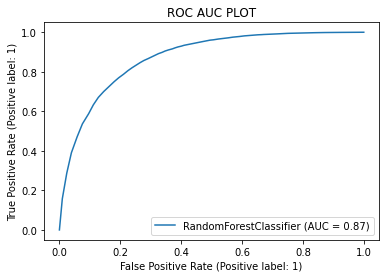

In [46]:
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

The area under the curve is maximum which shows the model is good.